In [82]:
import numpy as np
import math
import matplotlib.pylab as pyplt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [83]:
# RT PIC - classic and nearest neighbour
import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np
import os
from shapely.geometry import Polygon
from shapely.geometry import Point

In [84]:
dim = 2

meshX = 64
meshY = 64

In [85]:
# create mesh objects
elementMesh = uw.mesh.FeMesh_Cartesian( elementType=("linear","constant"), 
                                         elementRes=(meshX, meshY), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(1.,1.0))
linearMesh   = elementMesh
constantMesh = elementMesh.subMesh

In [86]:
# create fevariables
velocityField    = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=dim )
pressureField    = uw.fevariable.FeVariable( feMesh=constantMesh, nodeDofCount=1 )
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

In [87]:
original_values

array([ 0.      ,  0.015625,  0.03125 ,  0.046875,  0.0625  ,  0.078125,
        0.09375 ,  0.109375,  0.125   ,  0.140625,  0.15625 ,  0.171875,
        0.1875  ,  0.203125,  0.21875 ,  0.234375,  0.25    ,  0.265625,
        0.28125 ,  0.296875,  0.3125  ,  0.328125,  0.34375 ,  0.359375,
        0.375   ,  0.390625,  0.40625 ,  0.421875,  0.4375  ,  0.453125,
        0.46875 ,  0.484375,  0.5     ,  0.515625,  0.53125 ,  0.546875,
        0.5625  ,  0.578125,  0.59375 ,  0.609375,  0.625   ,  0.640625,
        0.65625 ,  0.671875,  0.6875  ,  0.703125,  0.71875 ,  0.734375,
        0.75    ,  0.765625,  0.78125 ,  0.796875,  0.8125  ,  0.828125,
        0.84375 ,  0.859375,  0.875   ,  0.890625,  0.90625 ,  0.921875,
        0.9375  ,  0.953125,  0.96875 ,  0.984375,  1.      ])

In [88]:
len(original_values), newys.shape
dy0

0.015625

In [89]:
new_values1, new_values2

(array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
         0.66666667,  0.7       ,  0.73333333,  0.76666667]),
 array([ 0.8  ,  0.805,  0.81 ,  0.815,  0.82 ,  0.825,  0.83 ,  0.835,
         0.84 ,  0.845,  0.85 ,  0.855,  0.86 ,  0.865,  0.87 ,  0.875,
         0.88 ,  0.885,  0.89 ,  0.895,  0.9  ,  0.905,  0.91 ,  0.915,
         0.92 ,  0.925,  0.93 ,  0.935,  0.94 ,  0.945,  0.95 ,  0.955,
         0.96 ,  0.965,  0.97 ,  0.975,  0.98 ,  0.985,  0.99 ,  0.995]))

In [90]:
#########
#create a dictionary that maps from the original regular mesh positions (y positions), to the new spacing, 

original_values = unique(linearMesh.data[:,1])
dy0 = 1./linearMesh.elementRes[1]
dyabove = 0.005
numabove = 0.2/dyabove
numbelow = linearMesh.elementRes[1] - numabove
dybelow = 0.8/(numbelow )

new_values1 = np.arange(linearMesh.minCoord[1], 0.8, dybelow) 
new_values2 = np.arange(0.8, linearMesh.maxCoord[1], dyabove)
newys = np.concatenate((new_values1, new_values2))
newys = np.append(newys, 1.)

#linearMesh.elementRes[1] 
#np.add?
newys.shape

d = {}
for i in range(len(original_values)):
    d[original_values[i]] = newys[i]

In [91]:
#Walk mesh nodes and use dictionary to lookup new Y positions
for index, coord in enumerate(linearMesh.data):
     y0 = coord[1]
     yn = d[y0]
     linearMesh.data[index][1] = yn

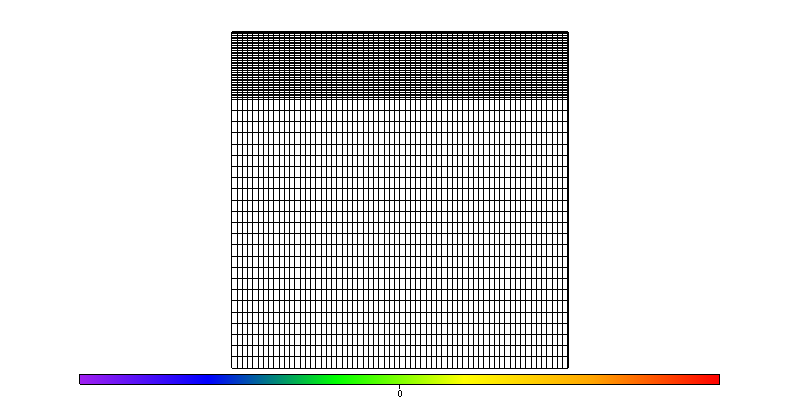

In [92]:
meshfig = plt.Figure(figsize=(800,400))
meshfig.Mesh(linearMesh, colourBar=True)
#meshfig.Mesh(linearMesh2, colors=jet)
meshfig.show()

In [93]:
indexField = uw.fevariable.FeVariable( feMesh=linearMesh, nodeDofCount=1)

for index, coord in enumerate(linearMesh.data):
    indexField.data[index] = index

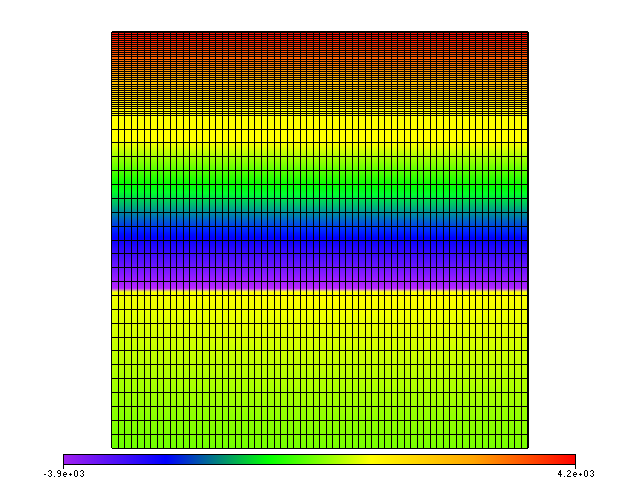

In [95]:
figtemp = plt.Figure()
figtemp.Surface(indexField, elementMesh)
figtemp.Mesh(linearMesh, colourBar=False)
figtemp.show()

<matplotlib.colorbar.Colorbar instance at 0x10da23bd8>

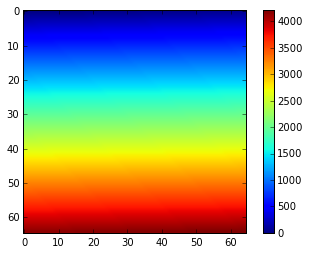

In [98]:
pyplt.imshow(indexField.data.reshape(meshX+1, meshY +1))
pyplt.colorbar()